In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Data - Iris DataSet

In [2]:
iris=datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [18]:
# The typicall case where we calculate the scores (without any confidence intervals)
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.33)

## Classification with KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

a = accuracy_score(y_test, y_pred)
p = precision_score(y_test,  y_pred,  average='weighted')
r = recall_score(y_test,  y_pred, average='weighted')
print "accuracy: {0}".format(a) 

accuracy: 0.96


## Classification with Tree methods

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

a = accuracy_score(y_test, y_pred)
p = precision_score(y_test,  y_pred,  average='weighted')
r = recall_score(y_test,  y_pred, average='weighted')
print "accuracy: {0}".format(a) 

accuracy: 0.96


## Classification with TensorFlow

In [49]:
# see here:
# https://towardsdatascience.com/hello-world-in-tensorflow-973e6c38e8ed

In [50]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://p

Accuracy: 98.00
Training finished!


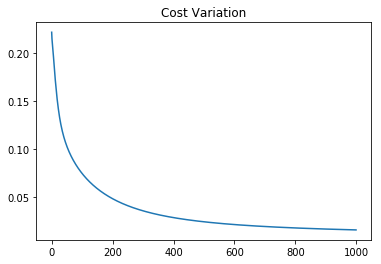

In [77]:

iris=datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
df.columns = ['f1','f2', 'f3', 'f4', 'f5']

train_data, test_data  = train_test_split(df,test_size=0.33)

#encode results to onehot
train_data['f5'] = train_data['f5'].map({0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]})
test_data['f5'] = test_data['f5'].map({0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]})

#separate train data
train_x = train_data[['f1', 'f2', 'f3', 'f4']]
train_y = train_data.ix[:, 'f5']

#separate test data
test_x = test_data[['f1', 'f2', 'f3', 'f4']]
test_y = test_data.ix[:, 'f5']

#placeholders for inputs and outputs
X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 3])

#weight and bias
weight = tf.Variable(tf.zeros([4, 3]))
bias = tf.Variable(tf.zeros([3]))

#output after going activation function
output = tf.nn.softmax(tf.matmul(X, weight) + bias)

#cost funciton
cost = tf.reduce_mean(tf.square(Y-output))

#train model
train = tf.train.AdamOptimizer(0.01).minimize(cost)

#check sucess and failures
success = tf.equal(tf.argmax(output, 1), tf.argmax(Y, 1))

#calculate accuracy
accuracy = tf.reduce_mean(tf.cast(success, tf.float32)) * 100

#initialize variables
init = tf.global_variables_initializer()

#start the tensorflow session
with tf.Session() as sess:
    costs = []
    sess.run(init)
    #train model 1000 times
    for i in range(1000):
        _,c = sess.run([train, cost], {X: train_x, Y: [t for t in train_y.as_matrix()]})
        costs.append(c)
        
        if i%100 == 0:
            train_accuracy = accuracy.eval(session=sess, feed_dict={X: test_x, Y: [t for t in test_y.as_matrix()]})
            #print train_accuracy

    print("Accuracy: %.2f" %accuracy.eval({X: test_x, Y: [t for t in test_y.as_matrix()]}))
    print("Training finished!")

    #plot cost graph
    plt.plot(range(1000), costs)
    plt.title("Cost Variation")
    plt.show()



In [ ]:
# looks like we get something better with NN